In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import time


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [28]:
df_white = pd.read_csv('winequality-white.csv', sep = ';')
df_red = pd.read_csv('winequality-red.csv', sep = ';')
datasets = [df_white, df_red]

In [29]:
current_dataset = df_white

In [30]:
print(current_dataset.shape)
current_dataset.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
current_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [32]:
current_dataset[current_dataset['quality']==9].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5.0,7.42000,0.983362,6.60000,6.9000,7.1000,7.40000,9.100
volatile acidity,5.0,0.29800,0.057619,0.24000,0.2600,0.2700,0.36000,0.360
citric acid,5.0,0.38600,0.082037,0.29000,0.3400,0.3600,0.45000,0.490
residual sugar,5.0,4.12000,3.759255,1.60000,2.0000,2.2000,4.20000,10.600
chlorides,5.0,0.02740,0.007436,0.01800,0.0210,0.0310,0.03200,0.035
free sulfur dioxide,5.0,33.40000,13.427584,24.00000,27.0000,28.0000,31.00000,57.000
total sulfur dioxide,5.0,116.00000,19.824228,85.00000,113.0000,119.0000,124.00000,139.000
density,5.0,0.99146,0.003118,0.98965,0.9898,0.9903,0.99055,0.997
pH,5.0,3.30800,0.082885,3.20000,3.2800,3.2800,3.37000,3.410
sulphates,5.0,0.46600,0.092628,0.36000,0.4200,0.4600,0.48000,0.610


In [33]:
current_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [34]:
current_dataset.isnull().sum()/len(current_dataset)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [35]:
features = current_dataset.columns

In [36]:
def plots(dataset, feature):
    sns.set_style({'font.family': 'serif'})
    sns.set_context("paper", font_scale=1)

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize = (6,4), gridspec_kw={"height_ratios": (.15, .85)})


    sns.boxplot(dataset[feature], ax=ax_box, color = 'lightgrey')
    sns.distplot(dataset[feature], ax=ax_hist, kde = False, color = 'black')


    ax_hist.set_ylabel('Freq',fontsize = 11)
    ax_hist.set_xlabel(feature,fontsize = 11)

    ax_box.set_xlabel('')

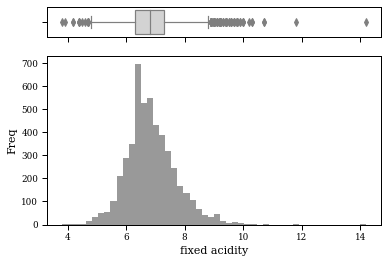

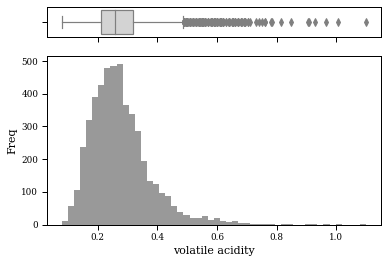

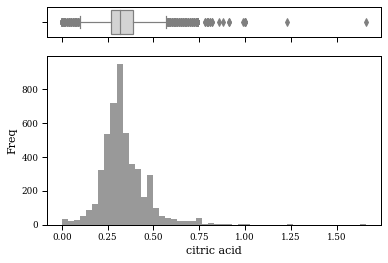

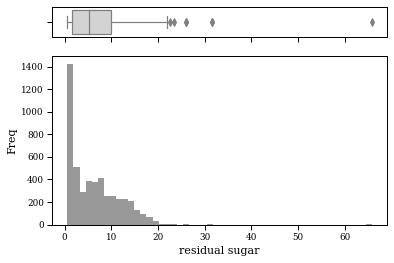

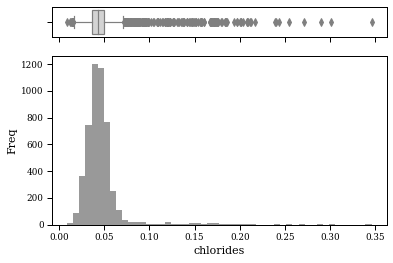

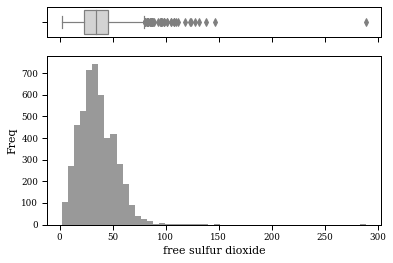

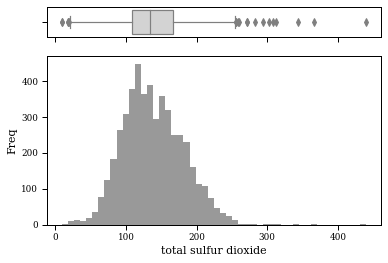

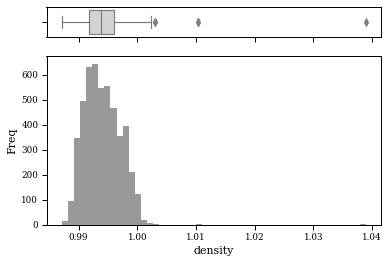

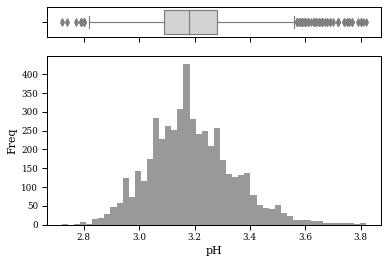

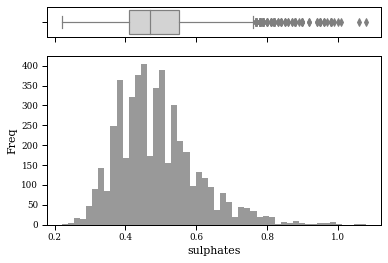

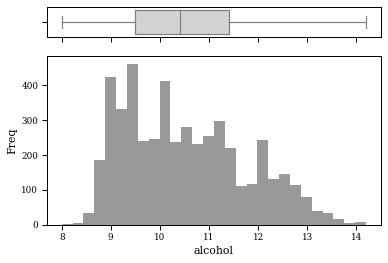

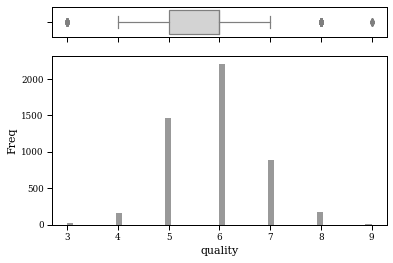

In [37]:
for i in features:
    plots(current_dataset, i)

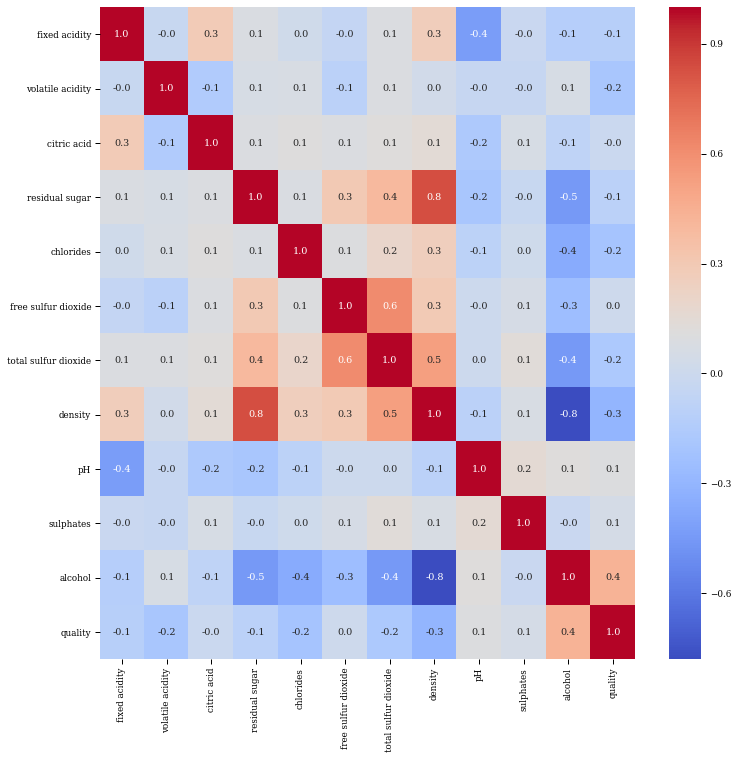

In [38]:
corr = current_dataset.corr()
fig, axs = plt.subplots(1,1,figsize=(12, 12))
sns.heatmap(corr, annot = True, cmap="coolwarm", fmt=".1f")

In [39]:
target = current_dataset['quality']
modeling_features = current_dataset.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(modeling_features, target, test_size = 0.2, random_state = 12, stratify = current_dataset['quality'])

In [40]:
models = [
    LogisticRegression(),
    LinearSVC(),
    GaussianNB(),
    SGDClassifier(),         
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
         ]    

In [41]:
def test_models(models):
    names = []
    train_scores = []
    test_scores = []
    print("\t\t\t\tModels\n"+("="*76))
    for i in models:
        s = time.time()
        name = str(i).split("(")[0]
        clf = i
        clf = clf.fit(X_train, y_train)
        trainscore = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
        testscore = cross_val_score(clf, X_test, y_test, cv = 5,  scoring = 'accuracy')
        e = time.time()
        print(i)
        print("Trainset accuracy: %0.2f (+/- %0.2f)" % (trainscore.mean(), trainscore.std() * 2))
        print("Testset accuracy: %0.2f (+/- %0.2f)" % (testscore.mean(), testscore.std() * 2))
        print("Time:  %0.2f s" % (e-s))
        print("="*76)
        names.append(name)
        train_scores.append(trainscore.mean())
        test_scores.append(testscore.mean())
        
    return names, train_scores, test_scores
        
        
a,b,c = test_models(models)

				Models
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Trainset accuracy: 0.53 (+/- 0.03)
Testset accuracy: 0.51 (+/- 0.04)
Time:  0.81 s
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Trainset accuracy: 0.32 (+/- 0.23)
Testset accuracy: 0.35 (+/- 0.23)
Time:  9.15 s
GaussianNB(priors=None, var_smoothing=1e-09)
Trainset accuracy: 0.45 (+/- 0.03)
Testset accuracy: 0.42 (+/- 0.05)
Time:  0.05 s
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,

In [42]:
results = pd.DataFrame(data=zip(b,c),columns=['Train score','Test score'], index = a)
results.sort_values(by = ['Train score', 'Test score'], ascending = False)


,Train score,Test score
XGBClassifier,0.651360,0.550252
RandomForestClassifier,0.637321,0.532603
DecisionTreeClassifier,0.570664,0.478819
SVC,0.550531,0.513265
LogisticRegression,0.531421,0.512232
KNeighborsClassifier,0.457643,0.432528
GaussianNB,0.451254,0.416413
SGDClassifier,0.358207,0.358034
LinearSVC,0.324873,0.345248


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
from sklearn.model_selection import GridSearchCV
# create Grid
param_grid = {'n_estimators': [100, 150, 200,300],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

if 1 == 0:
    booster_grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, n_jobs=-1)
    booster_grid_search.fit(X_train, y_train)
    print(booster_grid_search.best_params_)

print("{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}")

{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [46]:
clf = XGBClassifier(n_estimators = 200, max_depth = 7, learning_rate = 0.1, gamma = 0.1, colsample_bytree = 0.6)
clf = clf.fit(X_train, y_train)
trainscore = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
testscore = cross_val_score(clf, X_test, y_test, cv = 5,  scoring = 'accuracy')
print("Trainset accuracy: %0.2f (+/- %0.2f)" % (trainscore.mean(), trainscore.std() * 2))
print("Testset accuracy: %0.2f (+/- %0.2f)" % (testscore.mean(), testscore.std() * 2))
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


Trainset accuracy: 0.66 (+/- 0.03)
Testset accuracy: 0.56 (+/- 0.03)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.58      0.21      0.31        33
           5       0.68      0.66      0.67       291
           6       0.66      0.80      0.72       440
           7       0.73      0.59      0.65       176
           8       0.92      0.31      0.47        35
           9       0.00      0.00      0.00         1

    accuracy                           0.68       980
   macro avg       0.51      0.37      0.40       980
weighted avg       0.68      0.68      0.67       980

